In [42]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_path='../data/Transaction_Data.csv'

try:
    df=pd.read_csv(data_path, header=0)
    print(df.head(5))
except Exception as e:
    print(f"Error Loading CSV: {e}")

        Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0     March'25  40632468    2571551     7934167    56726423    565567.8   
1  February'25  40346611    2653977     7562366    43238584    408127.0   
2   January'25  40093882    2706098     7547244    42458039    393176.2   
3  December'24  39574049    2674512     7544985    44842543    407028.1   
4  November'24  39193282    2612063     7365236    41974856    365662.1   

   CCT_Number  CCT_Amount  PCT_Number  PCT_Amount  TIC_Number  TCT_Amount  
0     5946347     38028.3      941748      6236.3    63614518    609832.4  
1     6696521     31171.1      700809      4423.3    50635914    443721.4  
2     5411184     33968.4      761341      4825.3    48630564    431969.9  
3     5638006     35321.0      745972      4563.6    51226521    446912.7  
4     5219817     30996.2      704420      4281.6    47899093    400939.8  


In [43]:
print(df.head())

        Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0     March'25  40632468    2571551     7934167    56726423    565567.8   
1  February'25  40346611    2653977     7562366    43238584    408127.0   
2   January'25  40093882    2706098     7547244    42458039    393176.2   
3  December'24  39574049    2674512     7544985    44842543    407028.1   
4  November'24  39193282    2612063     7365236    41974856    365662.1   

   CCT_Number  CCT_Amount  PCT_Number  PCT_Amount  TIC_Number  TCT_Amount  
0     5946347     38028.3      941748      6236.3    63614518    609832.4  
1     6696521     31171.1      700809      4423.3    50635914    443721.4  
2     5411184     33968.4      761341      4825.3    48630564    431969.9  
3     5638006     35321.0      745972      4563.6    51226521    446912.7  
4     5219817     30996.2      704420      4281.6    47899093    400939.8  


In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Period      76 non-null     object 
 1   IC_Debit    76 non-null     int64  
 2   IC_Credit   76 non-null     int64  
 3   IC_Prepaid  76 non-null     int64  
 4   DCT_Number  76 non-null     int64  
 5   DCT_Amount  76 non-null     float64
 6   CCT_Number  76 non-null     int64  
 7   CCT_Amount  76 non-null     float64
 8   PCT_Number  76 non-null     int64  
 9   PCT_Amount  76 non-null     float64
 10  TIC_Number  76 non-null     int64  
 11  TCT_Amount  76 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 7.3+ KB
None


In [45]:
def parse_period(period):
    try:
        month=period.split("'")[0]
        year= period.split("'")[1]
        fullyear=int(f"20{year}")
        return pd.to_datetime(f"{month} 1 {fullyear}", format='%B %d %Y')
    except Exception as e:
        print(f"Warning:Could Not parse {period}. Error: {e}")
        return pd.NaT
df['Period']=df['Period'].apply(parse_period)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Period      76 non-null     datetime64[ns]
 1   IC_Debit    76 non-null     int64         
 2   IC_Credit   76 non-null     int64         
 3   IC_Prepaid  76 non-null     int64         
 4   DCT_Number  76 non-null     int64         
 5   DCT_Amount  76 non-null     float64       
 6   CCT_Number  76 non-null     int64         
 7   CCT_Amount  76 non-null     float64       
 8   PCT_Number  76 non-null     int64         
 9   PCT_Amount  76 non-null     float64       
 10  TIC_Number  76 non-null     int64         
 11  TCT_Amount  76 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 7.3 KB
None
      Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0 2025-03-01  40632468    2571551     7934167    56726423    565567.8   
1 202

In [46]:
df.dropna(subset=['Period'],inplace=True)


In [47]:
df.sort_values(by='Period',inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Period      76 non-null     datetime64[ns]
 1   IC_Debit    76 non-null     int64         
 2   IC_Credit   76 non-null     int64         
 3   IC_Prepaid  76 non-null     int64         
 4   DCT_Number  76 non-null     int64         
 5   DCT_Amount  76 non-null     float64       
 6   CCT_Number  76 non-null     int64         
 7   CCT_Amount  76 non-null     float64       
 8   PCT_Number  76 non-null     int64         
 9   PCT_Amount  76 non-null     float64       
 10  TIC_Number  76 non-null     int64         
 11  TCT_Amount  76 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 7.3 KB
None
      Period  IC_Debit  IC_Credit  IC_Prepaid  DCT_Number  DCT_Amount  \
0 2018-12-01  15069435    1349842      243432    16692928    124488.8   
1 201

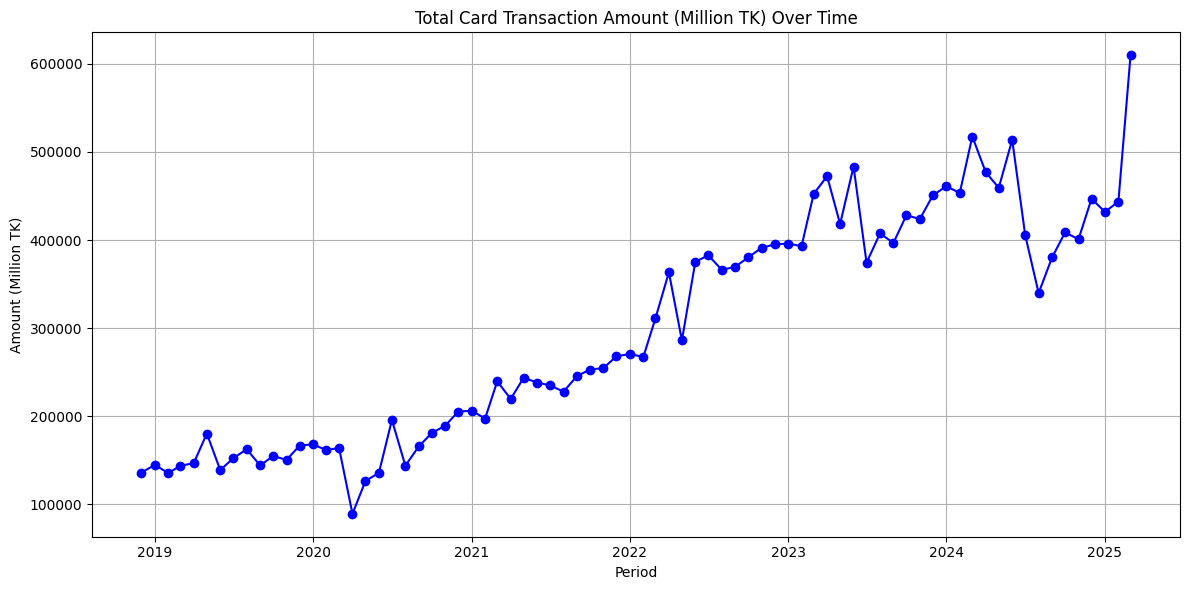

In [48]:

df_plot = df.set_index('Period')

plt.figure(figsize=(12, 6))
plt.plot(df_plot.index, df_plot['TCT_Amount'], marker='o', linestyle='-', color='b')
plt.title('Total Card Transaction Amount (Million TK) Over Time')
plt.xlabel('Period')
plt.ylabel('Amount (Million TK)')
plt.grid(True)
plt.tight_layout()
plt.show()

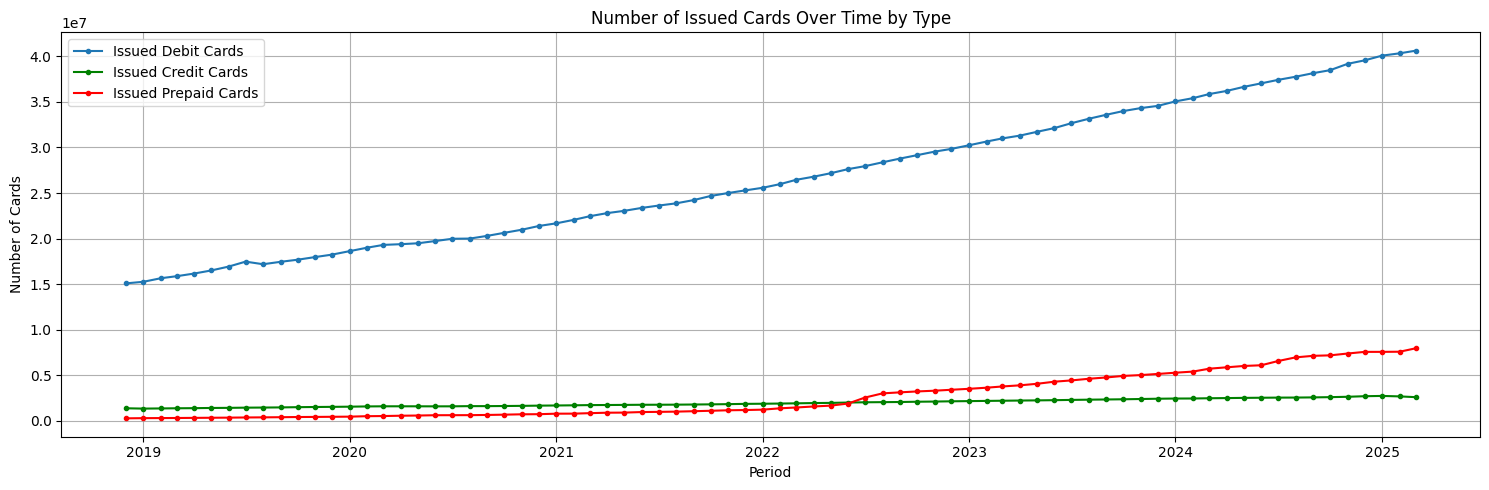

In [49]:
plt.figure(figsize=(15, 5))
plt.plot(df_plot.index, df_plot['IC_Debit'], label='Issued Debit Cards', marker='.', linestyle='-')
plt.plot(df_plot.index, df_plot['IC_Credit'], label='Issued Credit Cards', marker='.', color='g',linestyle='-')
plt.plot(df_plot.index, df_plot['IC_Prepaid'], label='Issued Prepaid Cards', marker='.',color='r', linestyle='-')
plt.title('Number of Issued Cards Over Time by Type')
plt.xlabel('Period')
plt.ylabel('Number of Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

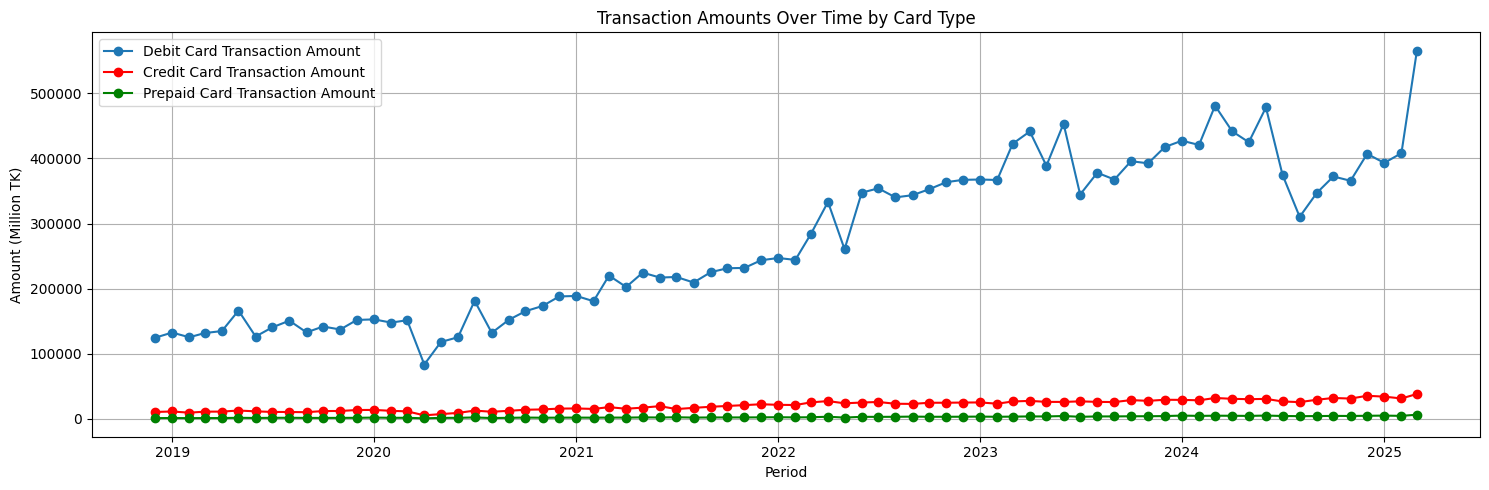

In [50]:
plt.figure(figsize=(15, 5))
plt.plot(df_plot.index, df_plot['DCT_Amount'], label='Debit Card Transaction Amount', marker='o', linestyle='-')
plt.plot(df_plot.index, df_plot['CCT_Amount'], label='Credit Card Transaction Amount', marker='o', color='red',linestyle='-')
plt.plot(df_plot.index, df_plot['PCT_Amount'], label='Prepaid Card Transaction Amount', marker='o',color='g', linestyle='-')
plt.title('Transaction Amounts Over Time by Card Type')
plt.xlabel('Period')
plt.ylabel('Amount (Million TK)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

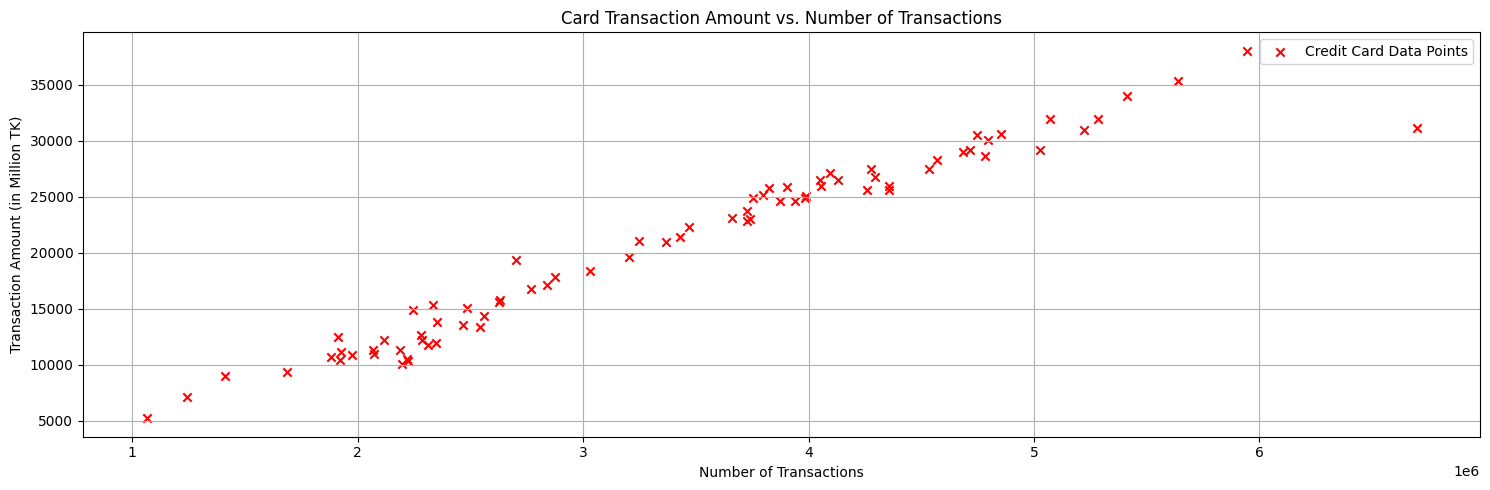

In [51]:
plt.figure(figsize=(15, 5))
plt.scatter(df['CCT_Number'], df['CCT_Amount'], marker='x', c='r', label='Credit Card Data Points')

plt.title('Card Transaction Amount vs. Number of Transactions')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Transactions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

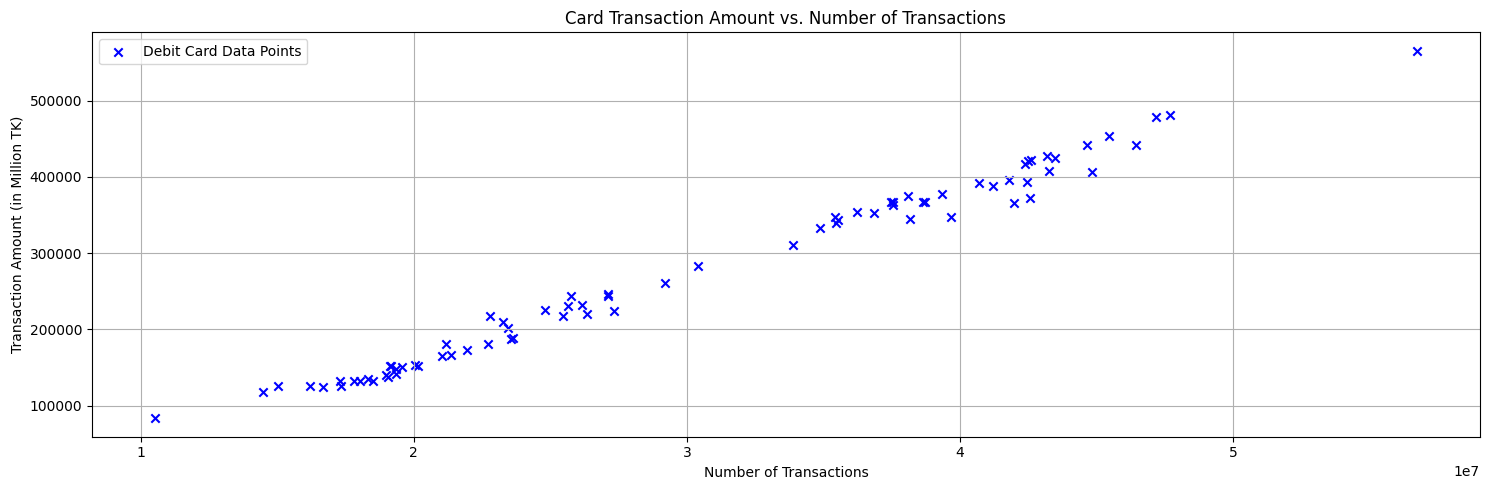

In [52]:
plt.figure(figsize=(15, 5))
plt.scatter(df['DCT_Number'], df['DCT_Amount'], marker='x', c='b', label='Debit Card Data Points')

plt.title('Card Transaction Amount vs. Number of Transactions')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Transactions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

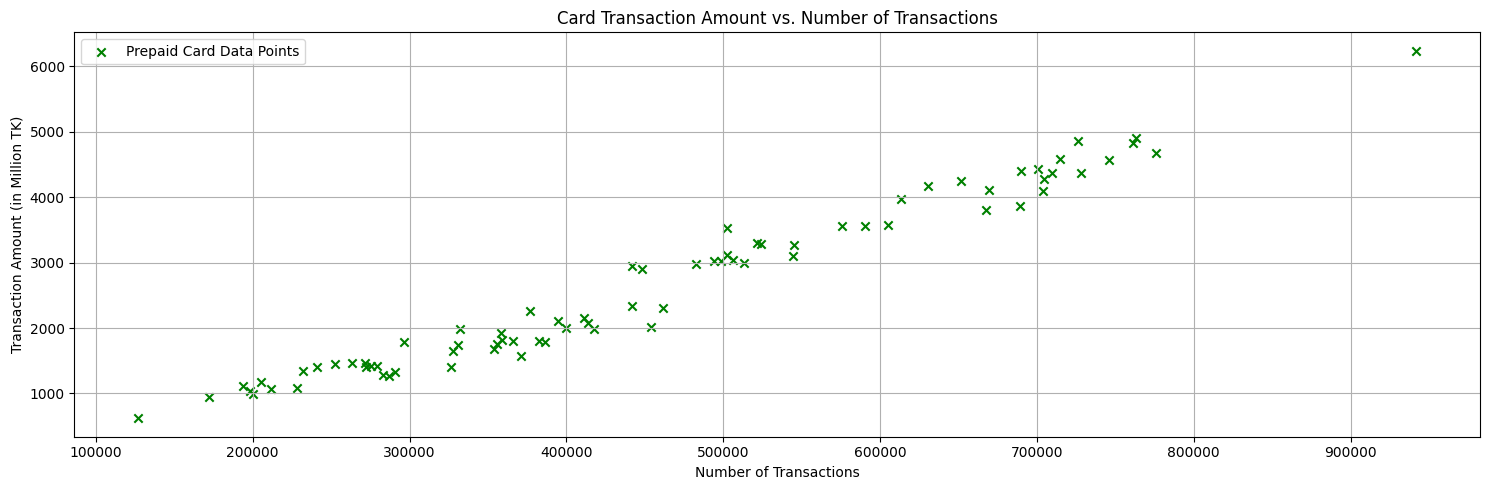

In [53]:
plt.figure(figsize=(15, 5))
plt.scatter(df['PCT_Number'], df['PCT_Amount'], marker='x', c='g', label='Prepaid Card Data Points')

plt.title('Card Transaction Amount vs. Number of Transactions')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Transactions')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

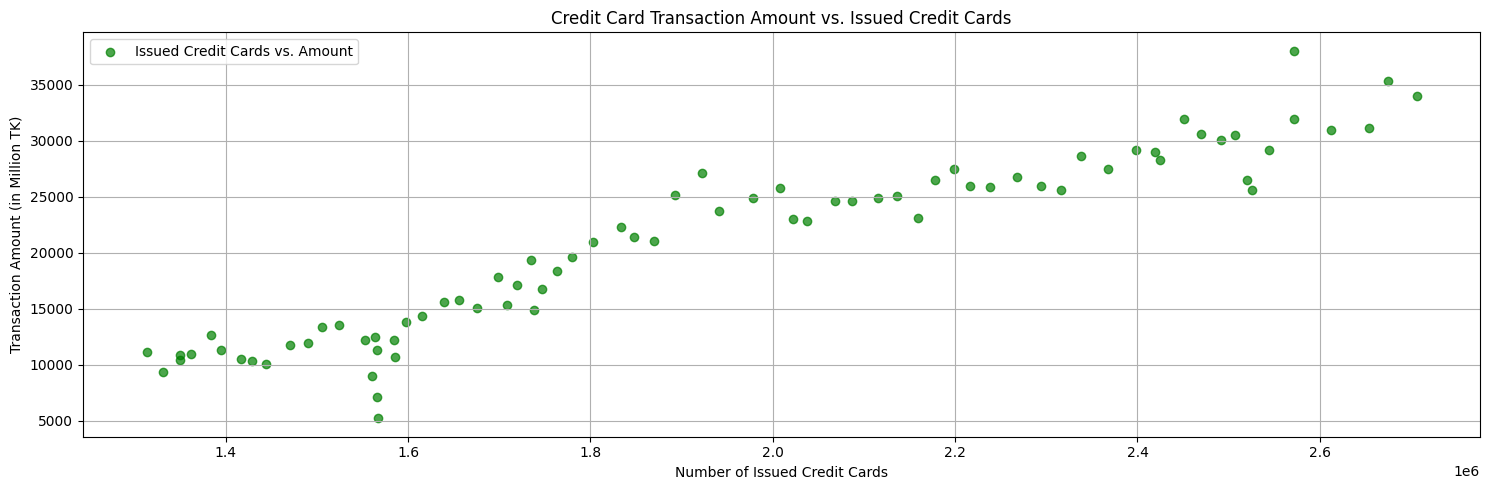

In [54]:
plt.figure(figsize=(15, 5))
plt.scatter(df['IC_Credit'], df['CCT_Amount'], marker='o', c='g', alpha=0.7, label='Issued Credit Cards vs. Amount')
plt.title('Credit Card Transaction Amount vs. Issued Credit Cards')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Issued Credit Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

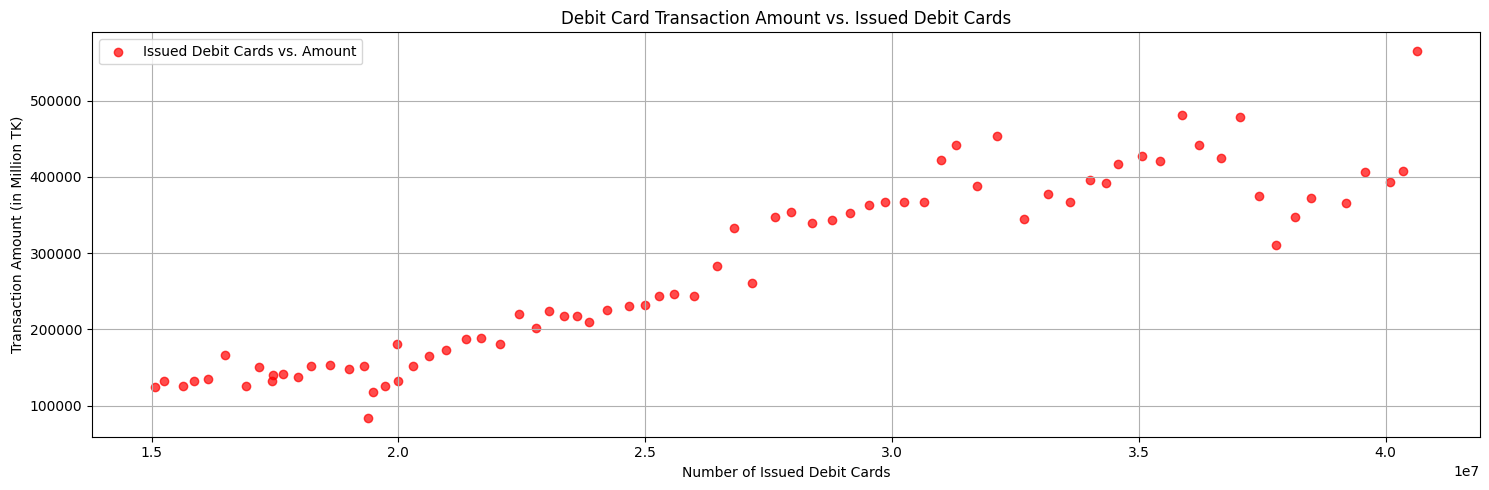

In [55]:
plt.figure(figsize=(15, 5))
plt.scatter(df['IC_Debit'], df['DCT_Amount'], marker='o', c='r', alpha=0.7, label='Issued Debit Cards vs. Amount')
plt.title('Debit Card Transaction Amount vs. Issued Debit Cards')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Issued Debit Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

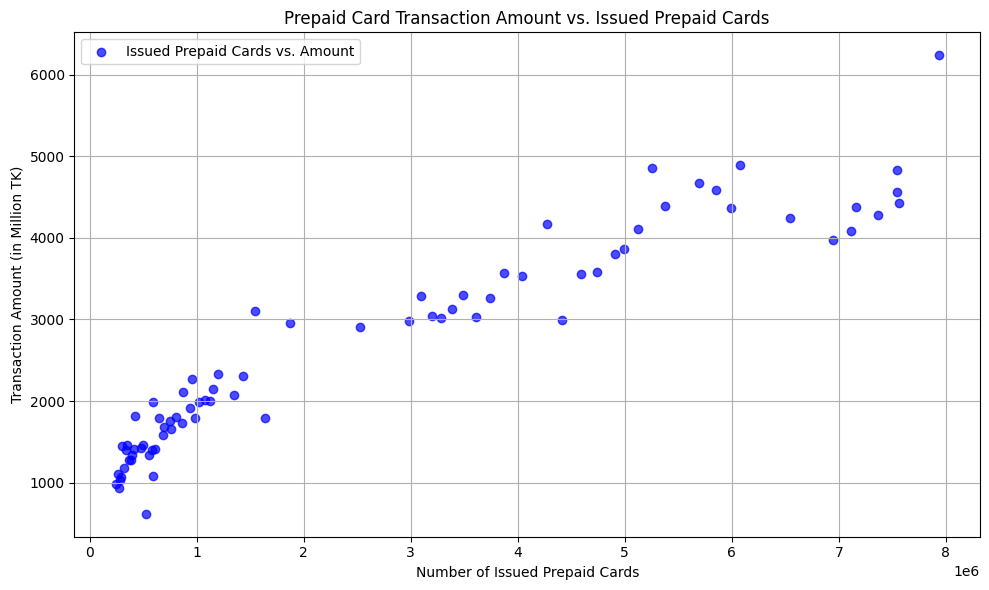

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(df['IC_Prepaid'], df['PCT_Amount'], marker='o', c='b', alpha=0.7, label='Issued Prepaid Cards vs. Amount')
plt.title('Prepaid Card Transaction Amount vs. Issued Prepaid Cards')
plt.ylabel('Transaction Amount (in Million TK)')
plt.xlabel('Number of Issued Prepaid Cards')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
print(df.shape[0])

76


In [58]:
X= df[['CCT_Number', 'IC_Credit']].values
y =df['CCT_Amount'].values
X_train=X[:65]
y_train=y[:65]
X_test=X[65:]
y_test=y[65:]


In [59]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)


X Shape: (65, 2), X Type:<class 'numpy.ndarray'>)
[[1922428 1349842]
 [1925238 1313133]
 [1686232 1331457]
 [1973804 1349292]
 [2074129 1361438]
 [2280825 1383529]
 [2066656 1394675]
 [2220007 1416652]
 [2222690 1428757]
 [2197317 1444397]
 [2311271 1470210]
 [2346662 1489650]
 [2542504 1505608]
 [2469512 1524492]
 [2286800 1552290]
 [2186570 1566074]
 [1064635 1566732]
 [1245319 1565360]
 [1412082 1560459]
 [1911173 1564039]
 [1882107 1585038]
 [2119260 1584816]
 [2354391 1597377]
 [2558886 1615051]
 [2626449 1639669]
 [2630922 1655921]
 [2484082 1676006]
 [2873498 1698741]
 [2336608 1708072]
 [2838557 1719832]
 [2701342 1734418]
 [2246057 1737932]
 [2769991 1746763]
 [3031396 1762978]
 [3203824 1779794]
 [3370208 1802876]
 [3471872 1833242]
 [3429392 1847534]
 [3249764 1869149]
 [3798207 1892324]
 [4093995 1922273]
 [3725590 1941162]
 [3752891 1978196]
 [3826773 2007724]
 [3741940 2022259]
 [3725173 2037598]
 [3941642 2068597]
 [3875289 2087136]
 [3985465 2115861]
 [3988104 2136173]


In [60]:
b =0
w = np.array([ 0, 0])
print(f"w shape: {w.shape}, b type: {type(b)}")

w shape: (2,), b type: <class 'int'>


In [61]:
def Predict(x,w,b):
    p=np.dot(x,w)+b
    return p

In [62]:
x_vec=X_train[0,:]
print(f"Shape={x_vec.shape},Value={x_vec}")

Shape=(2,),Value=[1922428 1349842]


In [63]:
f_wb=Predict(x_vec,w,b)
print(f"Shape={f_wb.shape},Value={f_wb}")


Shape=(),Value=0


In [64]:
def zscore_normalize_features(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    x_norm=(X-mu)/sigma
    return (x_norm,mu,sigma)


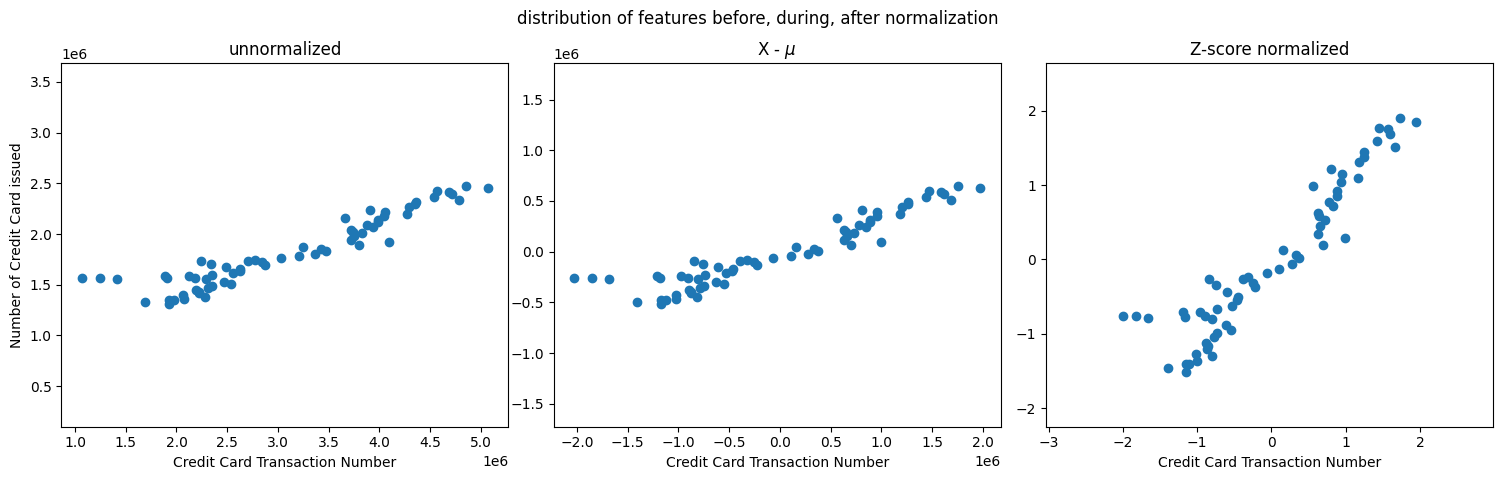

In [65]:
mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma
X_features = ['Credit Card Transaction Number', 'Number of Credit Card issued']

fig,ax=plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(X_train[:,0], X_train[:,1])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[1]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,1])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[1]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,1])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[1]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [66]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [3094578.96923077 1825838.83076923], 
X_sigma = [1015113.55901246  339103.35722252]
Peak to Peak range by column in Raw        X:[4007625 1156408]
Peak to Peak range by column in Normalized X:[3.94795731 3.41019331]


In [98]:
def Cost_compute(X,y,w,b):
    m=X.shape[0]

    f_wb_i=np.dot(X,w)+b

    errors=f_wb_i-y
    squared_errors=errors**2
    sum_squared_errors=np.sum(squared_errors)
    cost=sum_squared_errors/(2*m)
    return cost
    




In [97]:
y_mu = np.mean(y_train)
y_sigma = np.std(y_train)
y_norm = (y_train-y_mu)/y_sigma
cost=Cost_compute(X_norm,y_norm,w,b)
print(f"Cost={cost}")

Cost=0.5


In [117]:
def Gradient_compute(X,y,w,b):
    m=X.shape[0]

    f_wb_i=np.dot(X,w)+b
    errors=f_wb_i-y
    multiply_for_w=np.dot(X.T,errors)
    Dj_dw= multiply_for_w/m
    sum_b=np.sum(errors)
    Dj_db= sum_b/(m)




    return Dj_dw,Dj_db



In [118]:
tmp_dj_dw, tmp_dj_db = Gradient_compute(X_train, y_train, w, b)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')



dj_db at initial w,b: -18805.266153846154
dj_dw at initial w,b: 
 [-6.52293448e+10 -3.65821250e+10]


In [121]:
def Gradient_decent(X,y,w,b,cost_function,gradient_function,alpha,NumOfIters):
    import copy
    import math
    J_history=[]
    w_inside=copy.deepcopy(w) #to avaoid modifying global
    b_inside=copy.deepcopy(b)
    for i in range(NumOfIters):
        dj_dw,dj_db =gradient_function(X, y, w_inside, b_inside)
        w_inside = w_inside - alpha * dj_dw
        b_inside = b_inside - alpha * dj_db
        if i<100000:
            J_history.append(cost_function(X, y, w_inside, b_inside))
        if i% math.ceil(NumOfIters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.5f}   ")
    return J_history, w_inside, b_inside


In [122]:
# initialize parameters
initial_w = np.zeros_like(w)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.1
# run gradient descent
J_hist,w_final,b_final = Gradient_decent(X_norm, y_norm, initial_w, initial_b,
                                                    Cost_compute, Gradient_compute,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    prediction_scaled = np.dot(X_norm[i], w_final) + b_final
    prediction_unscaled = prediction_scaled * y_sigma + y_mu
    print(f"prediction: {prediction_unscaled:0.2f}, target value: {y_train[i]:0.2f}")

Iteration    0: Cost  0.33186   
Iteration  100: Cost  0.01477   
Iteration  200: Cost  0.01317   
Iteration  300: Cost  0.01269   
Iteration  400: Cost  0.01255   
Iteration  500: Cost  0.01251   
Iteration  600: Cost  0.01249   
Iteration  700: Cost  0.01249   
Iteration  800: Cost  0.01249   
Iteration  900: Cost  0.01249   
b,w found by gradient descent: -1.0999748120901526e-16,[0.8549564  0.13972981] 
prediction: 10490.31, target value: 10432.80
prediction: 10400.65, target value: 11135.80
prediction: 9039.27, target value: 9348.90
prediction: 10792.76, target value: 10886.10
prediction: 11421.65, target value: 10976.70
prediction: 12708.83, target value: 12636.70
prediction: 11473.65, target value: 11353.90
prediction: 12444.82, target value: 10481.20
prediction: 12495.74, target value: 10354.80
prediction: 12390.87, target value: 10063.80
prediction: 13139.98, target value: 11807.80
prediction: 13405.71, target value: 11955.10
prediction: 14610.91, target value: 13396.70
predict

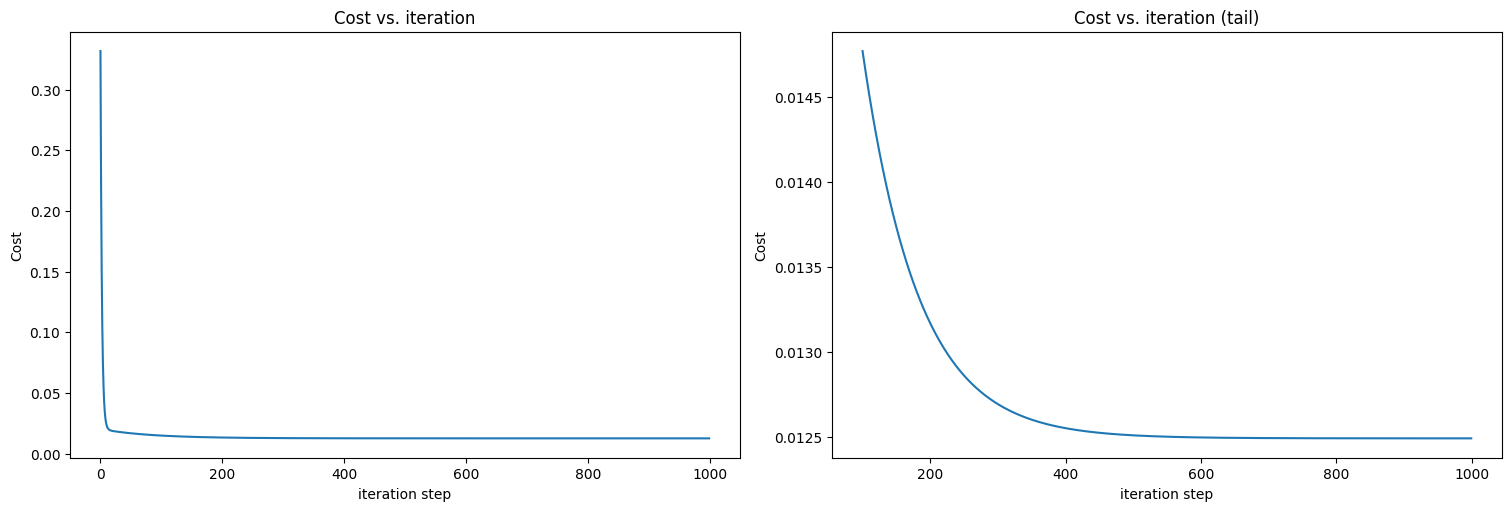

In [123]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 5))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

In [125]:
y_pred_train_scaled = Predict(X_norm, w_final, b_final)
y_pred_train_unscaled = y_pred_train_scaled * y_sigma + y_mu
mae_train = np.mean(np.abs(y_pred_train_unscaled - y_train))
rmse_train = np.sqrt(np.mean((y_pred_train_unscaled - y_train)**2))
print(f"\nTraining Set Performance:")
print(f"  MAE (unscaled): {mae_train:.2f}")
print(f"  RMSE (unscaled): {rmse_train:.2f}")





mu     = np.mean(X_train,axis=0)
sigma  = np.std(X_train,axis=0)
X_test_norm = (X_test - mu)/sigma

y_pred_test_scaled = Predict(X_test_norm, w_final, b_final)
y_pred_test_unscaled = y_pred_test_scaled * y_sigma + y_mu

mae_test = np.mean(np.abs(y_pred_test_unscaled - y_test))
rmse_test = np.sqrt(np.mean((y_pred_test_unscaled - y_test)**2))
print(f"\nTest Set Performance:")
print(f"  MAE (unscaled): {mae_test:.2f}")
print(f"  RMSE (unscaled): {rmse_test:.2f}")



Training Set Performance:
  MAE (unscaled): 842.61
  RMSE (unscaled): 1110.55

Test Set Performance:
  MAE (unscaled): 2255.08
  RMSE (unscaled): 3782.95


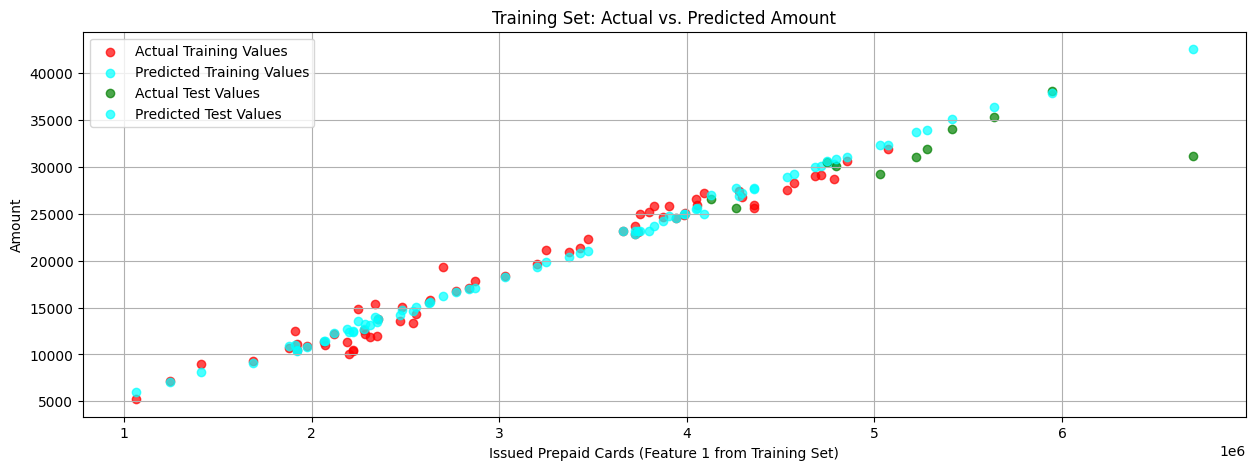

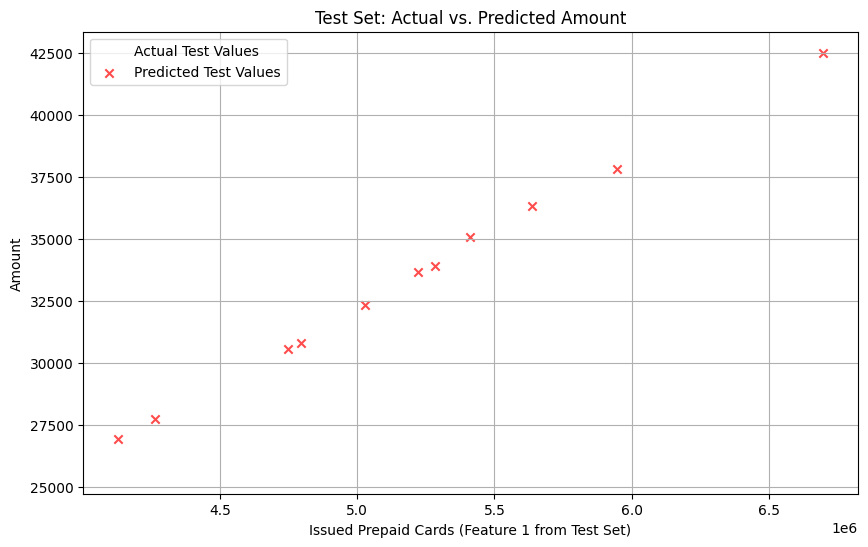

In [142]:
y_pred_train_scaled = Predict(X_norm, w_final, b_final)
y_pred_train_unscaled = y_pred_train_scaled * y_sigma + y_mu
plt.figure(figsize=(15, 5))
plt.scatter(X_train[:, 0], y_train, marker='o', c='r', alpha=0.7, label='Actual Training Values')
plt.scatter(X_train[:, 0], y_pred_train_unscaled, marker='o', c='cyan', alpha=0.7, label='Predicted Training Values')
plt.scatter(X_test[:, 0], y_test, marker='o', c='g', alpha=0.7, label='Actual Test Values')
plt.scatter(X_test[:, 0], y_pred_test_unscaled, marker='o', c='cyan', alpha=0.7, label='Predicted Test Values')
plt.xlabel("Issued Prepaid Cards (Feature 1 from Training Set)")
plt.ylabel("Amount")
plt.title("Training Set: Actual vs. Predicted Amount")
plt.legend()
plt.grid(True)
plt.show()




